<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-des-librairies-utiles" data-toc-modified-id="Importation-des-librairies-utiles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation des librairies utiles</a></span></li><li><span><a href="#Obtention-des-données" data-toc-modified-id="Obtention-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtention des données</a></span></li><li><span><a href="#Exploration-de-la-Donnée" data-toc-modified-id="Exploration-de-la-Donnée-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploration de la Donnée</a></span><ul class="toc-item"><li><span><a href="#Identifier-les-features-et-le-Label" data-toc-modified-id="Identifier-les-features-et-le-Label-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Identifier les features et le Label</a></span></li><li><span><a href="#Etude-des-valeurs-dupliquées" data-toc-modified-id="Etude-des-valeurs-dupliquées-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Etude des valeurs dupliquées</a></span></li><li><span><a href="#Etude-basique-de-valeurs-aberrantes" data-toc-modified-id="Etude-basique-de-valeurs-aberrantes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Etude basique de valeurs aberrantes</a></span></li><li><span><a href="#Etude-des-valeurs-manquantes" data-toc-modified-id="Etude-des-valeurs-manquantes-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Etude des valeurs manquantes</a></span></li><li><span><a href="#Distribution-des-données" data-toc-modified-id="Distribution-des-données-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Distribution des données</a></span></li><li><span><a href="#Matrice-de-correlations" data-toc-modified-id="Matrice-de-correlations-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Matrice de correlations</a></span></li><li><span><a href="#Résumé-de-la-partie-exploratoire---transformations-pertinentes?" data-toc-modified-id="Résumé-de-la-partie-exploratoire---transformations-pertinentes?-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Résumé de la partie exploratoire - transformations pertinentes?</a></span></li></ul></li><li><span><a href="#Préparation-des-données" data-toc-modified-id="Préparation-des-données-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Préparation des données</a></span><ul class="toc-item"><li><span><a href="#Gestion-des-données-manquantes" data-toc-modified-id="Gestion-des-données-manquantes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gestion des données manquantes</a></span></li><li><span><a href="#Correction-ou-suppression-de-valeurs-aberrantes" data-toc-modified-id="Correction-ou-suppression-de-valeurs-aberrantes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Correction ou suppression de valeurs aberrantes</a></span></li><li><span><a href="#Sélection-de-feature" data-toc-modified-id="Sélection-de-feature-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sélection de feature</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Feature-Scaling-and/or-Normalization" data-toc-modified-id="Feature-Scaling-and/or-Normalization-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span><a href="https://colab.research.google.com/github/ml-course/master/blob/master/notebooks/06%20-%20Data%20Preprocessing.ipynb" rel="nofollow" target="_blank">Feature Scaling and/or Normalization</a></a></span></li><li><span><a href="#Encoder-les-variables-catégorielles" data-toc-modified-id="Encoder-les-variables-catégorielles-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Encoder les variables catégorielles</a></span></li><li><span><a href="#Créer-un-pipeline" data-toc-modified-id="Créer-un-pipeline-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Créer un pipeline</a></span></li></ul></li></ul></div>

<img src="https://miro.medium.com/v2/resize:fit:1400/0*-G8VWk7x24EcOyza" alt="image" width="100%">

L'objectif de ce Lab est de préparer les données permettant de prédire les prix de l'immobilier en Californie en 1990.

Les données concernent les maisons trouvées dans un district californien donné et quelques statistiques récapitulatives à leur sujet basées sur les données du recensement de 1990. Soyez averti que les données ne sont pas nettoyées, certaines étapes de prétraitement sont donc requises ! Les colonnes sont les suivantes, leurs noms sont assez explicites :

longitude

latitude

logement_âge médian_

total_chambres

total_chambres

population

ménages

revenu_médian

valeur médiane_de la maison

océan_proximité

Le prétraitement comprend la détection et la gestion des valeurs manquantes, l'enodage des caractéristiques catégorielles et ne se limite pas à ces étapes.

## Importation des librairies utiles

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import des librairies
import os, random

import numpy as np # manipulation de matrices
import pandas as pd # chargement de donnees

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# visualition de valeurs manquantes
import missingno as msno

# gestion des valeurs manquantes
from sklearn.impute import SimpleImputer

# encodage des variables categorielles
from sklearn.preprocessing import OneHotEncoder

# mise a l'echelle des variables numeriques
from sklearn.preprocessing import StandardScaler

# separation de la donnee en train, validation, et test
from sklearn.model_selection import train_test_split

# création de pipeline
from sklearn.pipeline import Pipeline


In [3]:
# ne modifier pas ce bout de code
seed = 2024
random.seed(seed)
np.random.seed(seed)

## Obtention des données

La donnée nécessaire pour ce Lab se trouve dans le dossier data/housing.csv.

# Charger le fichier housing.csv depuis mon PC local vers Colab

In [7]:
# Charger le fichier housing.csv depuis mon PC local vers Colab
from google.colab import files

uploaded = files.upload()


Saving housing.csv to housing.csv


In [8]:
# charger la donnée
housing_df = pd.read_csv('housing.csv')

In [9]:
# afficher les 5 premières lignes
print(housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [10]:
# vérifier la taille de la donnée
print("Taille du DataFrame : ", housing_df.shape)

Taille du DataFrame :  (20640, 10)


In [11]:
# vérifier le type de donnée (série temporelle, échantillon, géographique, ...)
print(housing_df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


Le data dredging (également connu sous le nom de data snooping ou p-hacking) est l'utilisation abusive de l'analyse de données pour trouver des modèles dans les données qui peuvent être présentés comme statistiquement significatifs, augmentant ainsi considérablement le risque de faux positifs et le sous-estimant.

In [ ]:
# mettez un échantillon de 20% de la donnée de côté que vous ne regarderez jamais
# en utilisant train_test_split. Utiliser random_state = 67
housing_train_df, housing_test_df = _, _

# sauvegarder les ensembles crees a l'aide de pd.to_csv dans le dossier data
# sous les noms housing_train.csv et housing_test.csv


In [12]:
# Utiliser train_test_split pour diviser les données
housing_train_df, housing_test_df = train_test_split(housing_df, test_size=0.2, random_state=67)

In [13]:
# Vérifier la taille des ensembles
print(f'Taille de housing_train_df : {housing_train_df.shape}')
print(f'Taille de housing_test_df : {housing_test_df.shape}')

Taille de housing_train_df : (16512, 10)
Taille de housing_test_df : (4128, 10)


In [15]:
!ls

housing.csv  sample_data


In [17]:
# Sauvegarder les ensembles en CSV
housing_train_df.to_csv('housing_train.csv', index=False)
housing_test_df.to_csv('housing_test.csv', index=False)

print("Ensembles sauvegardés avec succès.")

Ensembles sauvegardés avec succès.


Pour les analyses subséquentes, veillez à ne travailler qu'avec la donnée d'entraînement.

## Exploration de la Donnée

### Identifier les features et le Label

- Combien de features/ caractéristiques sont présentes dans le jeu de données?
- Quels sont leurs types?
- Le Label est-il continu ou catégoriel?

In [25]:
# Nombre de features / caractéristiques
num_features = housing_df.shape[1]
print(f"Nombre de features : {num_features}")

Nombre de features : 10


In [26]:
# Types des features
print("Types des features :")
print(housing_df.dtypes)

Types des features :
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [28]:
# Vérification du type du Label
label_column = 'median_house_value'
label_type = housing_df[label_column].dtype
label_type_desc = "continu" if label_type in ['int64', 'float64'] else "catégoriel"
print(f"Type du Label ({label_column}) : {label_type_desc}")

Type du Label (median_house_value) : continu


### Etude des valeurs dupliquées

In [29]:
# Vérifier et afficher les lignes dupliquées
duplicates = housing_df[housing_df.duplicated()]
print("Exemples de lignes dupliquées :")
print(duplicates)


Exemples de lignes dupliquées :
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


### Etude basique de valeurs aberrantes

In [18]:
## description du jeu de données et interpretation
# comparaison des valeurs extrêmes au valeurs centrales


In [31]:
# Description statistique du jeu de données
description = housing_df.describe()
# Affichage des statistiques pour interprétation
print(description)

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Les valeurs extrêmes telles que la maison la plus chère à 500,001 dollars et la plus grande maison avec 39,320 chambres montrent une grande variabilité par rapport aux valeurs centrales. Par exemple, la médiane du revenu médian est de 3,87, mais il y a des valeurs extrêmes avec un revenu médian maximum de 15,00, indiquant une large dispersion dans les revenus.








### Etude des valeurs manquantes

In [19]:
# visualiser les valeurs manquantes de quatre façons différentes
# et interpréter chaque visualisation
# simple tableau


In [32]:

missing_values_summary = housing_df.isnull().sum()
print(missing_values_summary)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Interprétation : Ce tableau montre le nombre de valeurs manquantes pour chaque variable. On observe que seule la variable total_bedrooms présente 207 valeurs manquantes, tandis que les autres variables sont complètes.

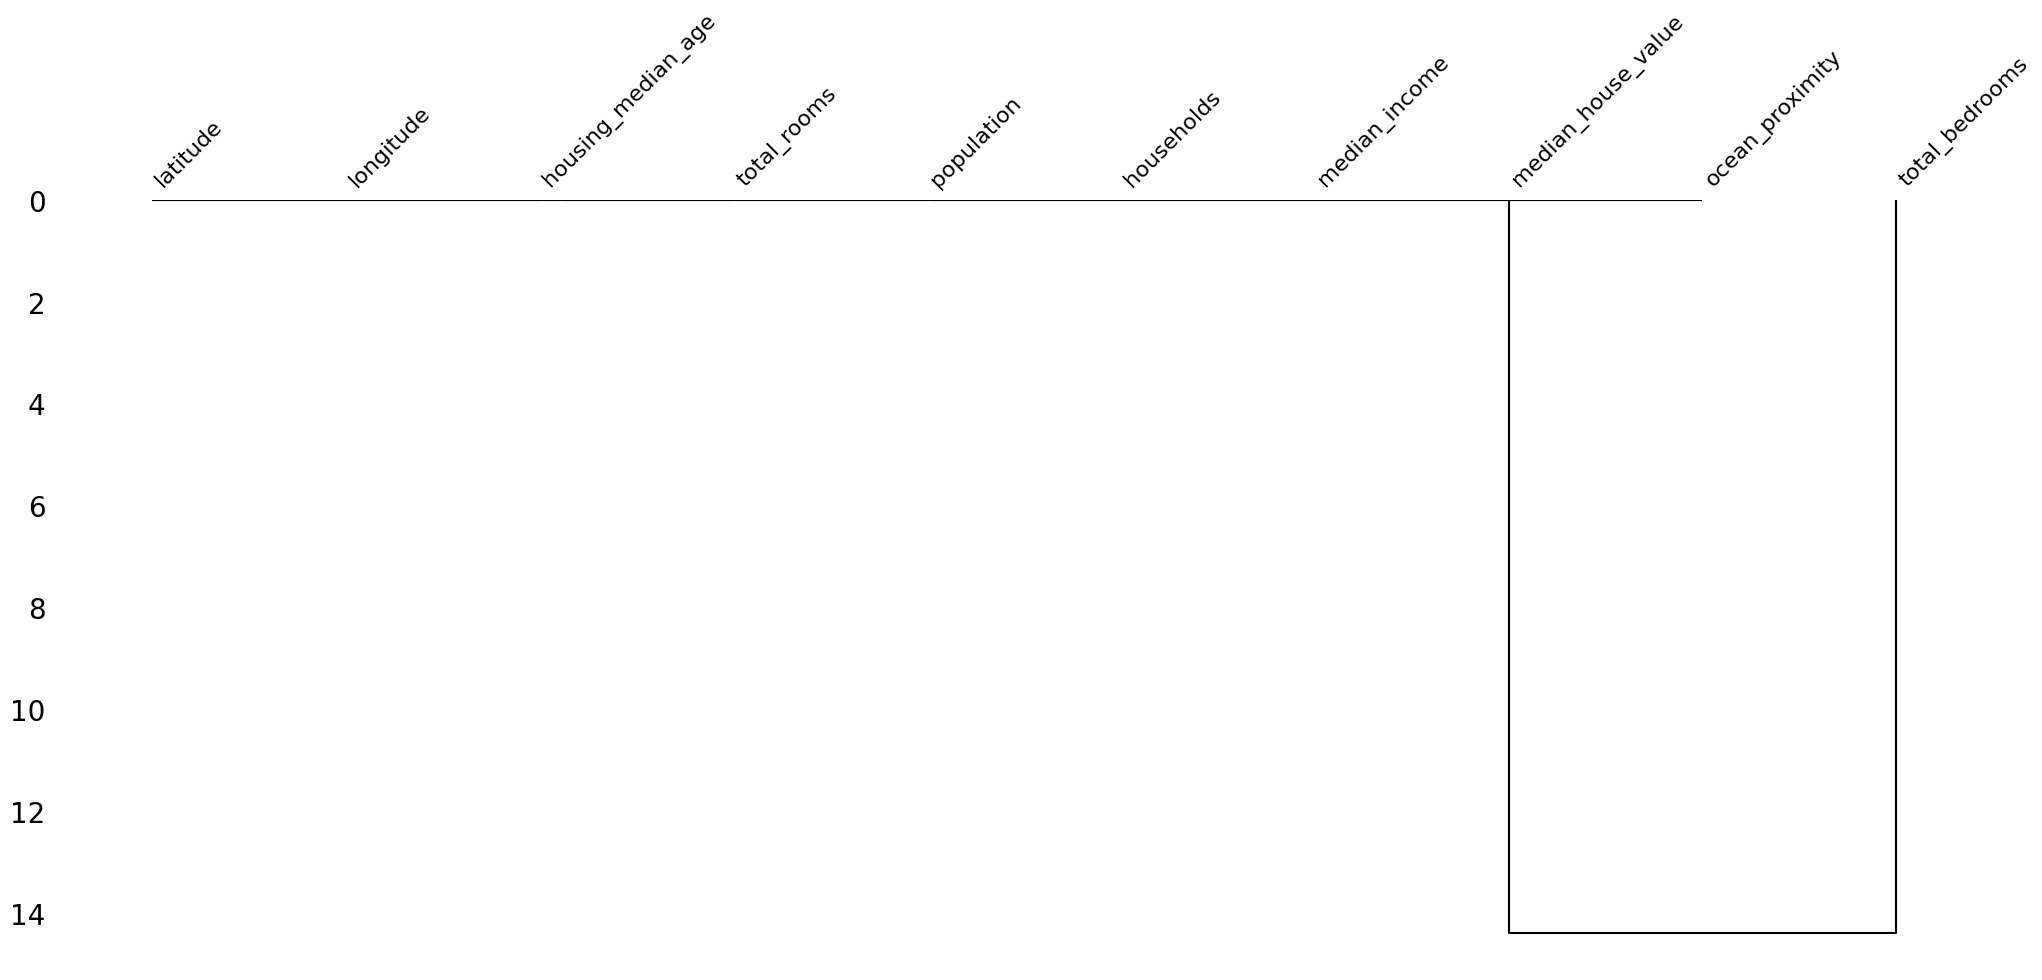

In [33]:
# dendograme


msno.dendrogram(housing_df)
plt.show()


Interprétation : Le dendrogramme montre les relations entre les différentes colonnes en fonction de la présence de valeurs manquantes. On peut observer des regroupements de variables avec des valeurs manquantes similaires.

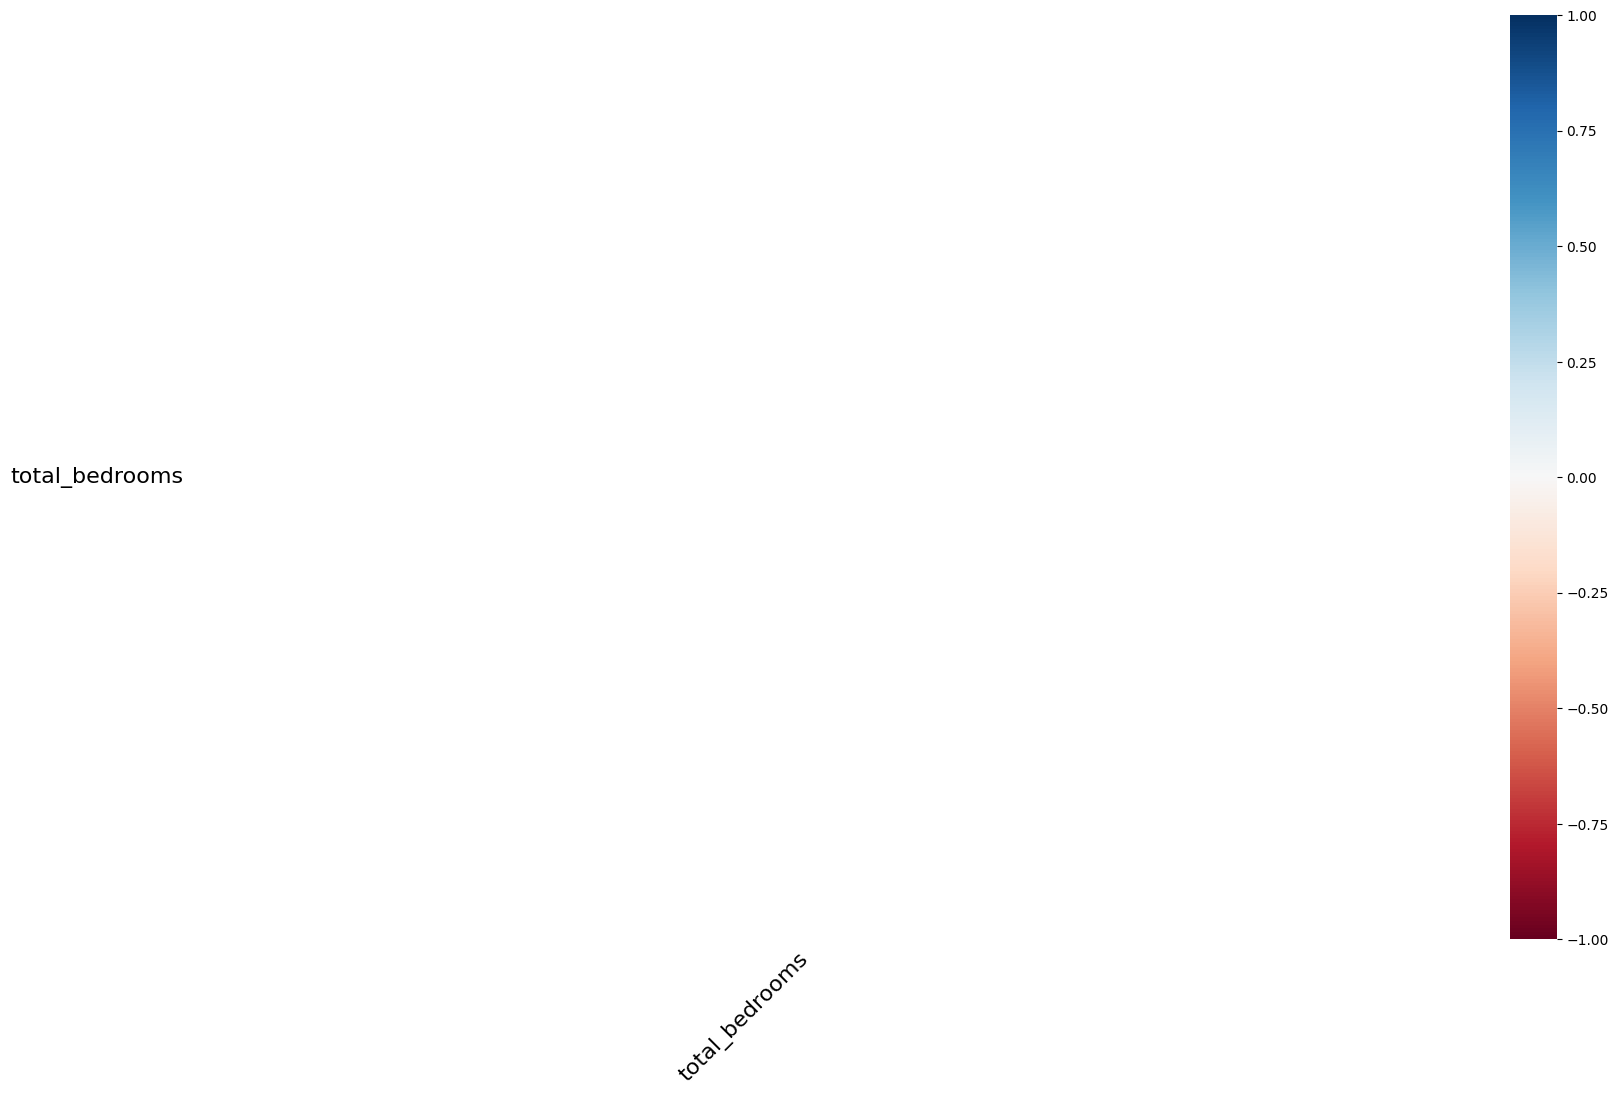

In [34]:
# heatmap de correlations
msno.heatmap(housing_df)
plt.show()

Interprétation : Le heatmap de corrélation montre comment les valeurs manquantes sont corrélées entre les différentes variables. Une forte corrélation positive (couleur plus claire) indique des variables qui ont tendance à avoir des valeurs manquantes simultanément.

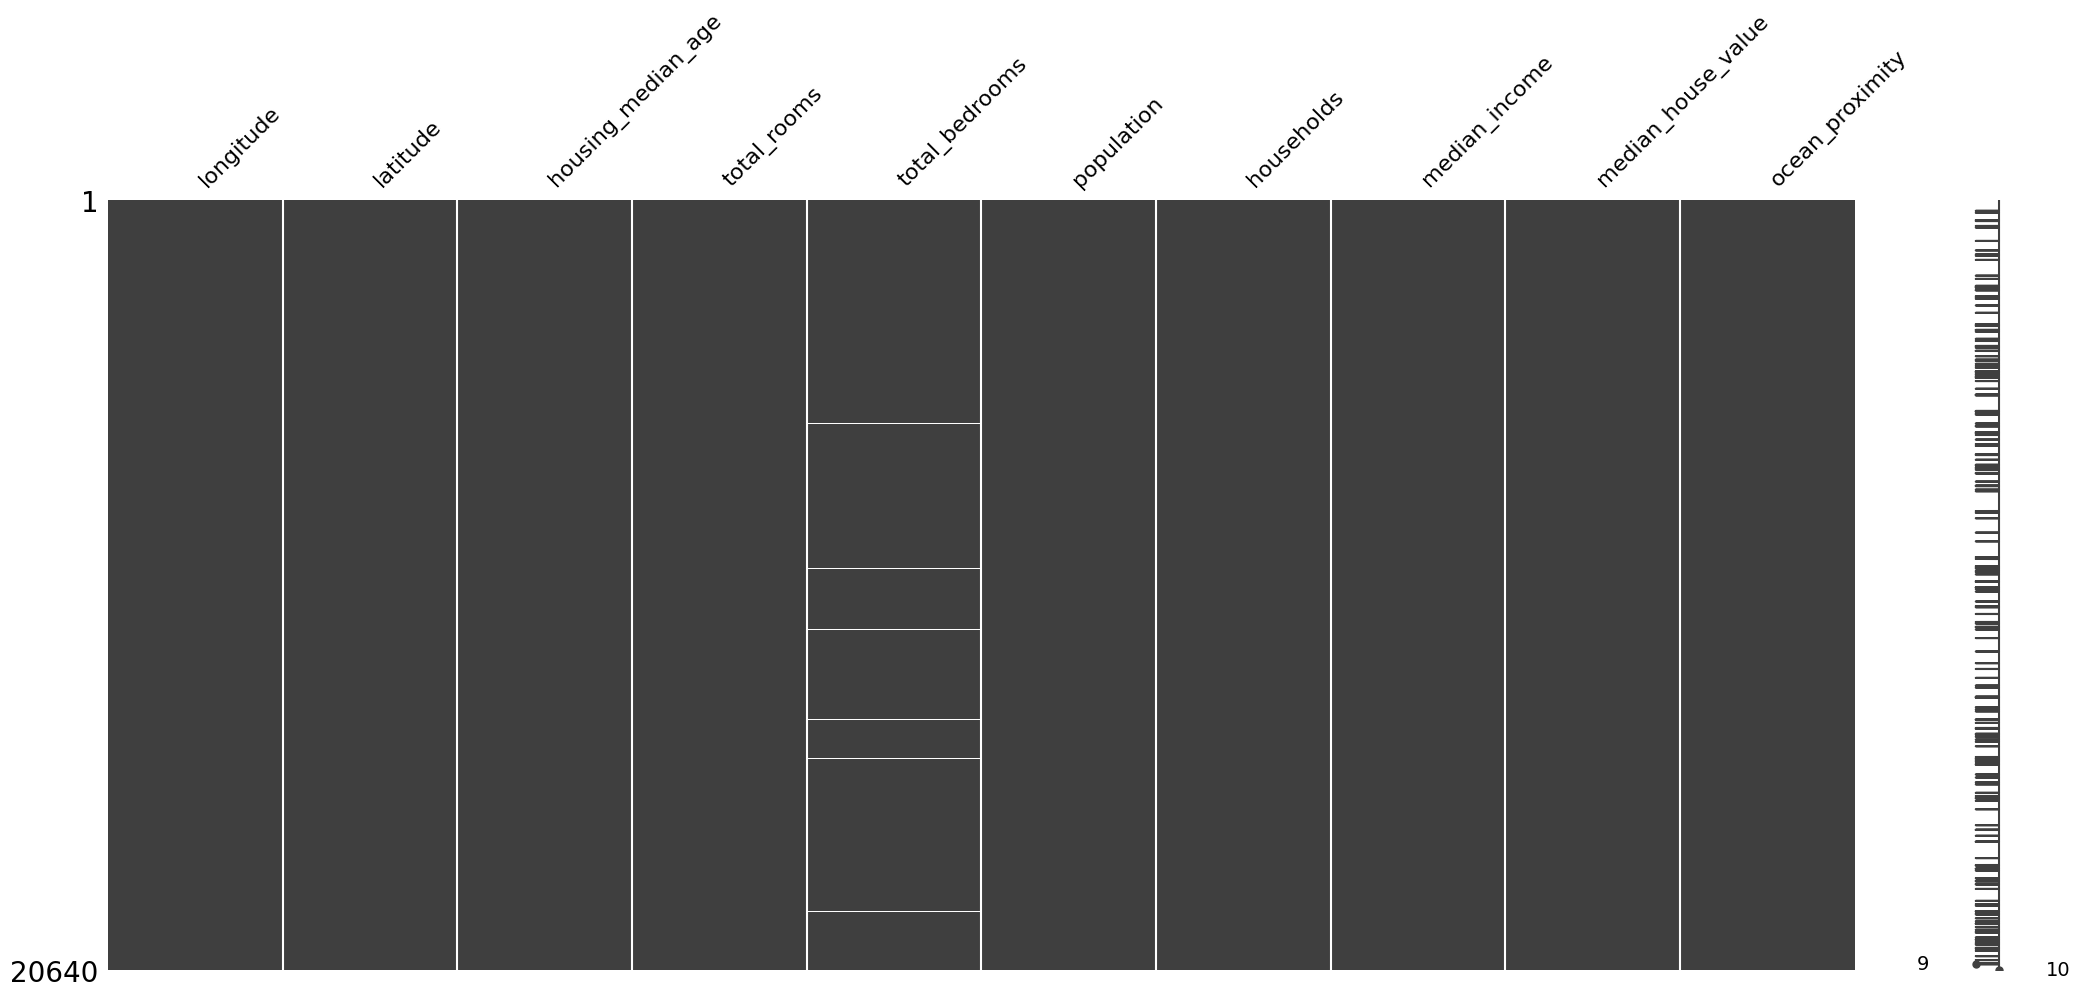

In [35]:
# Matrice
msno.matrix(housing_df)
plt.show()

Interprétation : La matrice des valeurs manquantes visualise la distribution des données manquantes dans tout le DataFrame. Les barres blanches représentent les valeurs manquantes, et leur répartition permet de voir visuellement les colonnes avec des données manquantes.

### Distribution des données

In [23]:
# Boxplot du Label vs chaque variable categorielle
# si le nombre de catégories n'excède 10, sinon des barplots


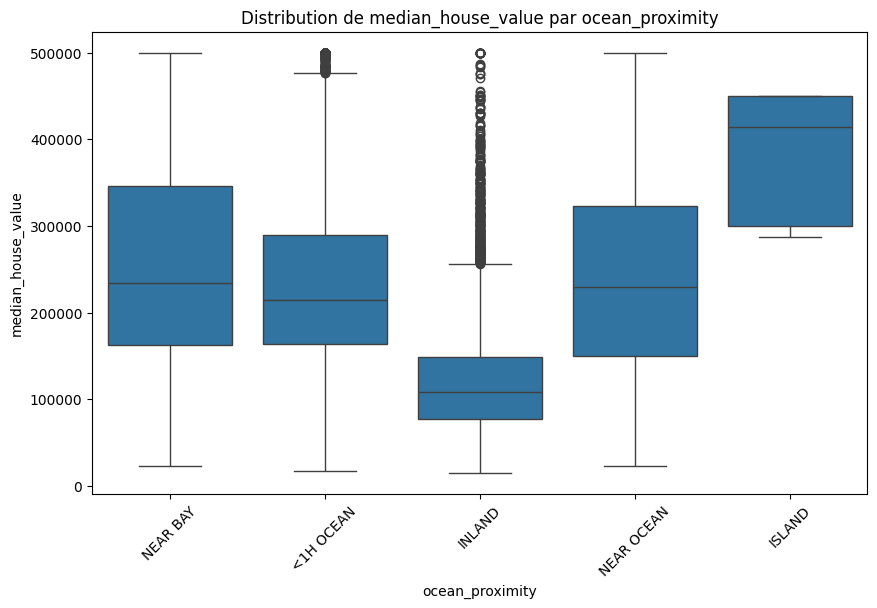

In [36]:
# Vérifier le nombre de catégories pour ocean_proximity
num_categories = housing_df['ocean_proximity'].nunique()

# Boxplot si le nombre de catégories est <= 10, sinon barplot
plt.figure(figsize=(10, 6))
if num_categories <= 10:
    sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_df)
else:
    sns.barplot(x='ocean_proximity', y='median_house_value', data=housing_df, estimator=np.mean)
plt.title('Distribution de median_house_value par ocean_proximity')
plt.xticks(rotation=45)
plt.show()

In [24]:
# subplots des distributions de toutes les variables numériques


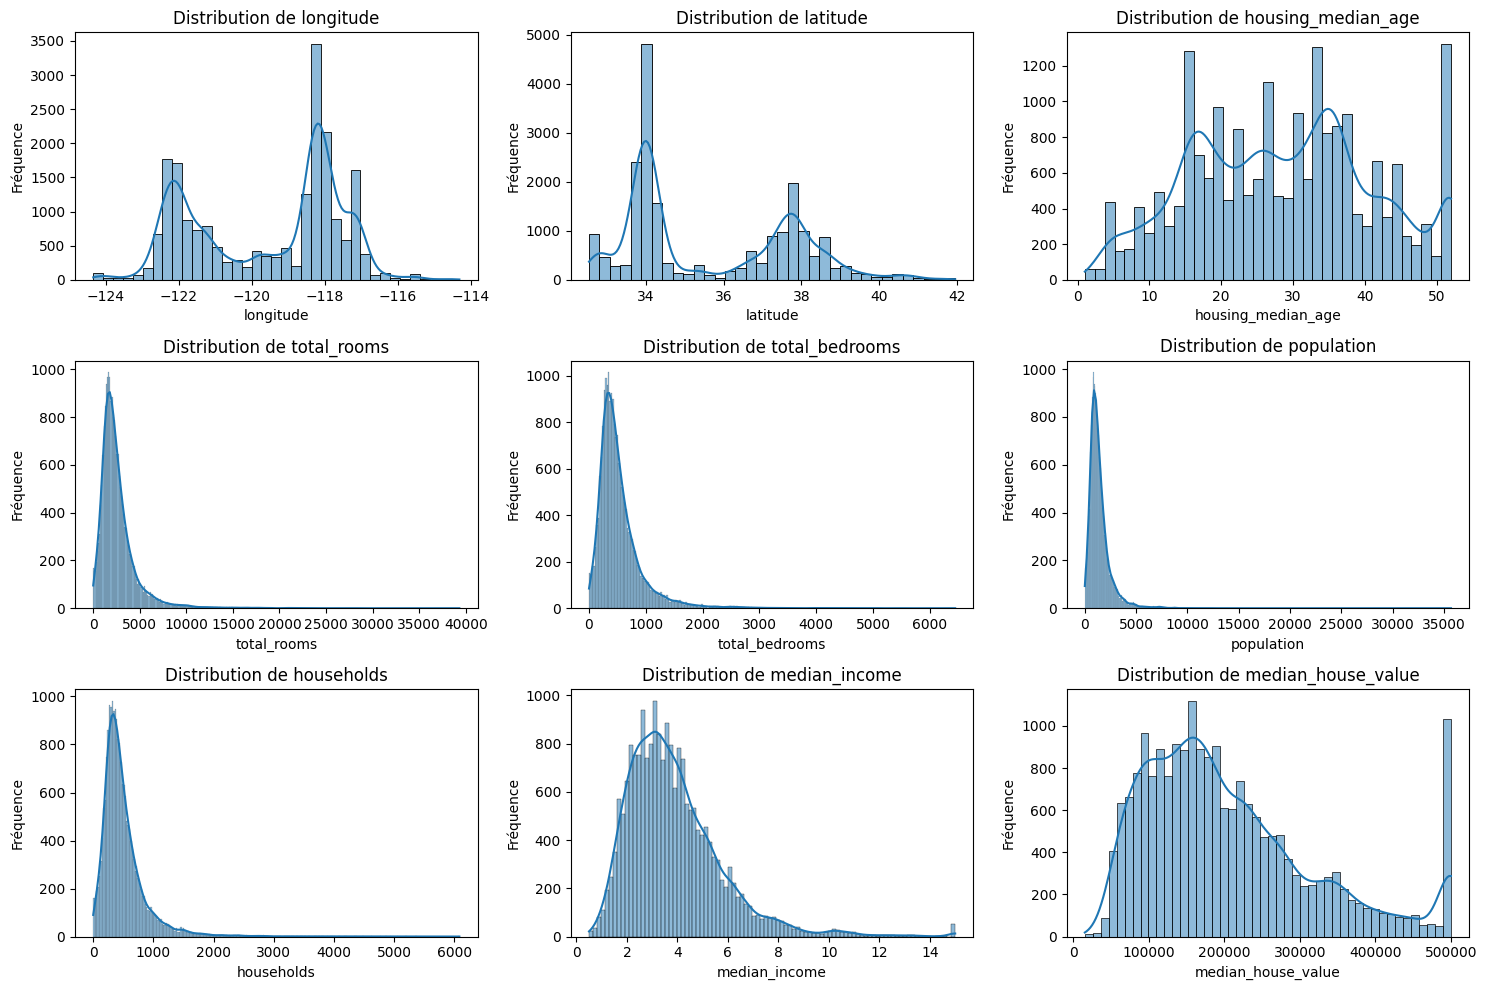

In [37]:
# Sélectionner les variables numériques
numeric_vars = ['longitude', 'latitude', 'housing_median_age',
                'total_rooms', 'total_bedrooms', 'population',
                'households', 'median_income', 'median_house_value']

# Créer des subplots pour chaque variable numérique
plt.figure(figsize=(15, 10))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(housing_df[var], kde=True)
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

### Matrice de correlations

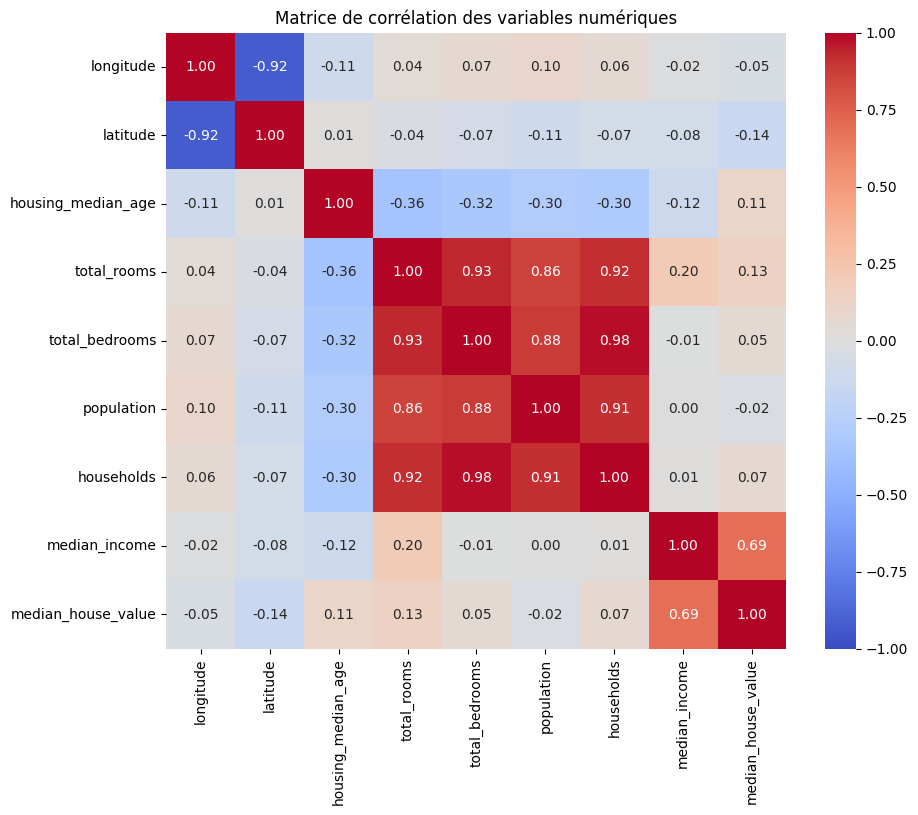

In [38]:
# Sélectionner les variables numériques
numeric_vars = ['longitude', 'latitude', 'housing_median_age',
                'total_rooms', 'total_bedrooms', 'population',
                'households', 'median_income', 'median_house_value']

# Calculer la matrice de corrélation
corr_matrix = housing_df[numeric_vars].corr()

# Afficher la matrice de corrélation avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

### Résumé de la partie exploratoire - transformations pertinentes?

## Préparation des données

### Gestion des données manquantes

- Utilisez l'une des trois approches classiques de gestion de données manquantes (suppression, encodage, imputation) à ce jeu de données et justifier votre choix. Discuter égalment de l'impact de votre approche sur les performances du modèle de prédiction du pric médian que vous concevrez plutard.

In [ ]:
# gestion des données manquantes


In [39]:
# Création d'un nouvel objet DataFrame pour le nettoyage
housing_train_clean_df = housing_train_df.copy()

# Imputation des valeurs manquantes pour 'total_bedrooms' avec la médiane
median_total_bedrooms = housing_train_clean_df['total_bedrooms'].median()
housing_train_clean_df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Vérification pour s'assurer qu'il n'y a plus de valeurs manquantes
print(housing_train_clean_df.isnull().sum())

# Affichage des premières lignes pour vérification
print(housing_train_clean_df.head())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6544     -118.02     34.05                34.0       1610.0           513.0   
10095    -117.94     33.93                33.0       1770.0           370.0   
19362    -123.49     38.70                 9.0       5409.0          1019.0   
19937    -119.38     36.30                14.0       1932.0           330.0   
14473    -117.22     32.84                19.0       2691.0           347.0   

       population  households  median_income  median_house_value  \
6544       2050.0       508.0         2.5562            156300.0   
10095      1346.0       366.0         4.0833            162500.0   
19362       594.0       327.0         3.3125            295400.0   


L'imputation par la médiane pour la variable `total_bedrooms` est choisie pour minimiser la perte de données et préserver la représentativité de l'échantillon, tout en réduisant la sensibilité aux valeurs aberrantes.

### Correction ou suppression de valeurs aberrantes

In [42]:
# Sélection des colonnes numériques uniquement
numeric_cols = housing_train_clean_df.select_dtypes(include=[np.number])

# Calcul des quantiles et de l'IQR pour les colonnes numériques
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour détecter les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrage pour exclure les valeurs aberrantes
housing_train_clean_df_no_outliers = housing_train_clean_df[(numeric_cols >= lower_bound) & (numeric_cols <= upper_bound)]

# Vérification de la taille avant et après la suppression
print(f"Avant suppression : {housing_train_clean_df.shape[0]} lignes")
print(f"Après suppression : {housing_train_clean_df_no_outliers.shape[0]} lignes")


Avant suppression : 16512 lignes
Après suppression : 16512 lignes


### Sélection de feature

In [ ]:
# supprimez les variables ne fournissant pas d'informations utiles
# pour prédire le prix médian des maisons


### Feature engineering

- Discrétisez les variables continues
- Décomposez les features si nécessaire : catégorie, date/time,...
- Effectuez des transformations prometeuses : aggrégation, log(x), sqrt(x),...


### [Feature Scaling and/or Normalization](https://colab.research.google.com/github/ml-course/master/blob/master/notebooks/06%20-%20Data%20Preprocessing.ipynb)

- Réduiser à la même échelle entre 0 et 1 toutes les variables numériques

### Encoder les variables catégorielles

### Créer un pipeline

- Créez un pipeline pour automatiser les transformations effectuer sur l'ensemble d'entraînement et éviter les fuites de données

- Séparez la donnée d'entraînement en ensemble d'entraînement et de validation

- Appliquer le pipeline créer dessus